In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)

all_players_stats = pd.read_csv('All_players_stats.csv')
all_players_stats.head()

,Season,Gamecode,Home,Player_ID,IsStarter,IsPlaying,Team,Dorsal,Player,Minutes,Points,FieldGoalsMade2,FieldGoalsAttempted2,FieldGoalsMade3,FieldGoalsAttempted3,FreeThrowsMade,FreeThrowsAttempted,OffensiveRebounds,DefensiveRebounds,TotalRebounds,Assistances,Steals,Turnovers,BlocksFavour,BlocksAgainst,FoulsCommited,FoulsReceived,Valuation,Plusminus,gamecode,group,datetime,TeamScore,OpponentScore,TeamName,OpponentName,PlayerName,Pos,total_fp
0,2023,1,1,P004720,0.0,1.0,RED,2,"LAZAREVIC, STEFAN",5.07,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,-1.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,CRVENA ZVEZDA MERIDIANBET BELGRADE,LDLC ASVEL VILLEURBANNE,S. Lazarevic,F,1.1
1,2023,1,1,PJDR,0.0,1.0,RED,4,"TEODOSIC, MILOS",14.62,3,0,3,1,3,0,0,0,3,3,2,1,1,0,0,4,0,-1,6.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,CRVENA ZVEZDA MERIDIANBET BELGRADE,LDLC ASVEL VILLEURBANNE,M. Teodosic,G,-0.9
2,2023,1,1,P005099,0.0,1.0,RED,5,"HANGA, ADAM",22.35,7,1,6,1,5,2,2,1,3,4,3,2,1,1,0,1,3,9,4.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,CRVENA ZVEZDA MERIDIANBET BELGRADE,LDLC ASVEL VILLEURBANNE,A. Hanga,F,9.9
3,2023,1,1,P002553,0.0,1.0,RED,9,"MITROVIC, LUKA",21.53,9,3,3,0,0,3,4,1,0,1,2,1,0,0,0,2,4,14,20.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,CRVENA ZVEZDA MERIDIANBET BELGRADE,LDLC ASVEL VILLEURBANNE,L. Mitrovic,F,15.4
4,2023,1,1,PLUO,1.0,0.0,RED,10,"LAZIC, BRANKO",12.77,6,0,0,2,2,0,0,1,1,2,0,0,0,0,0,0,0,8,7.0,E2023_1,Regular Season,2023-10-05 19:00:00,94,73,CRVENA ZVEZDA MERIDIANBET BELGRADE,LDLC ASVEL VILLEURBANNE,B. Lazic,G,8.8


### Bivariate Analysis

Study the Correlations between the various skill actions and the target variable (total_fp). Also, try to study the correlations using the lag of k latest matches, as this should be the input of a possible model.  

In [3]:
all_players_stats.columns

Index(['Season', 'Gamecode', 'Home', 'Player_ID', 'IsStarter', 'IsPlaying',
       'Team', 'Dorsal', 'Player', 'Minutes', 'Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds',
       'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived', 'Valuation', 'Plusminus', 'gamecode', 'group',
       'datetime', 'TeamScore', 'OpponentScore', 'TeamName', 'OpponentName',
       'PlayerName', 'Pos', 'total_fp'],
      dtype='object')

In [4]:
## Add new features to study that correlation too

all_players_stats['FieldGoalsPCT'] = (all_players_stats['FieldGoalsMade2']+all_players_stats['FieldGoalsMade3']) / (
                                            all_players_stats['FieldGoalsAttempted2']+all_players_stats['FieldGoalsAttempted3'])
all_players_stats['FreeThrowsPCT'] = all_players_stats['FreeThrowsMade'] / all_players_stats['FreeThrowsAttempted']

all_players_stats['TotalShotsPCT'] = (all_players_stats['FreeThrowsMade']+all_players_stats['FieldGoalsMade2']+all_players_stats['FieldGoalsMade3']) / (
                                            all_players_stats['FreeThrowsAttempted']+all_players_stats['FieldGoalsAttempted2']+all_players_stats['FieldGoalsAttempted3'])

all_players_stats['AssistSteal_Turnover_Ratio'] = (all_players_stats['Assistances'] + all_players_stats['Steals']) / (
                                                            all_players_stats['Turnovers'])

all_players_stats['BlocksFavor_BlocksAgainst_Ratio'] = all_players_stats['BlocksFavour'] / all_players_stats['BlocksAgainst']

all_players_stats['FoulsReceived_FoulsCommitted_Ratio'] = all_players_stats['FoulsReceived'] / all_players_stats['FoulsCommited'] 

In [5]:
# Replace inf values with the maximum finite value in each column
# Replace infinite values with the maximum finite value in each column
all_players_stats['AssistSteal_Turnover_Ratio'] = all_players_stats['AssistSteal_Turnover_Ratio'].where(
    ~np.isinf(all_players_stats['AssistSteal_Turnover_Ratio']),
    all_players_stats['AssistSteal_Turnover_Ratio'][~np.isinf(all_players_stats['AssistSteal_Turnover_Ratio'])].max()
)

all_players_stats['BlocksFavor_BlocksAgainst_Ratio'] = all_players_stats['BlocksFavor_BlocksAgainst_Ratio'].where(
    ~np.isinf(all_players_stats['BlocksFavor_BlocksAgainst_Ratio']),
    all_players_stats['BlocksFavor_BlocksAgainst_Ratio'][~np.isinf(all_players_stats['BlocksFavor_BlocksAgainst_Ratio'])].max()
)

# Replace NaN values with 0, assuming NaN here represents cases where no actions were recorded
all_players_stats['AssistSteal_Turnover_Ratio'] = all_players_stats['AssistSteal_Turnover_Ratio'].fillna(0)
all_players_stats['BlocksFavor_BlocksAgainst_Ratio'] = all_players_stats['BlocksFavor_BlocksAgainst_Ratio'].fillna(0)

# Replace NaN values in the specified columns with 0
all_players_stats[['FieldGoalsPCT', 'FreeThrowsPCT', 'FoulsReceived_FoulsCommitted_Ratio']] = all_players_stats[['FieldGoalsPCT', 'FreeThrowsPCT', 'FoulsReceived_FoulsCommitted_Ratio']].fillna(0)

In [6]:
all_players_stats.columns

Index(['Season', 'Gamecode', 'Home', 'Player_ID', 'IsStarter', 'IsPlaying',
       'Team', 'Dorsal', 'Player', 'Minutes', 'Points', 'FieldGoalsMade2',
       'FieldGoalsAttempted2', 'FieldGoalsMade3', 'FieldGoalsAttempted3',
       'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds',
       'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals',
       'Turnovers', 'BlocksFavour', 'BlocksAgainst', 'FoulsCommited',
       'FoulsReceived', 'Valuation', 'Plusminus', 'gamecode', 'group',
       'datetime', 'TeamScore', 'OpponentScore', 'TeamName', 'OpponentName',
       'PlayerName', 'Pos', 'total_fp', 'FieldGoalsPCT', 'FreeThrowsPCT',
       'TotalShotsPCT', 'AssistSteal_Turnover_Ratio',
       'BlocksFavor_BlocksAgainst_Ratio',
       'FoulsReceived_FoulsCommitted_Ratio'],
      dtype='object')

In [7]:
# Define the skill actions
skill_actions = [
    'Minutes', 'Points', 'FieldGoalsMade2', 'FieldGoalsAttempted2', 'FieldGoalsMade3', 
    'FieldGoalsAttempted3', 'FreeThrowsMade', 'FreeThrowsAttempted', 'OffensiveRebounds', 
    'DefensiveRebounds', 'TotalRebounds', 'Assistances', 'Steals', 'Turnovers', 
    'BlocksFavour', 'BlocksAgainst', 'FoulsCommited', 'FoulsReceived', 'Valuation', 
    'Plusminus', 'FieldGoalsPCT', 'FreeThrowsPCT', 'TotalShotsPCT', 
    'AssistSteal_Turnover_Ratio', 'BlocksFavor_BlocksAgainst_Ratio'
]

# Calculate Pearson correlations
correlation_results = {
    "Feature": [],
    "Pearson_Correlation": []
}

for feature in skill_actions:
    if feature in all_players_stats.columns:
        correlation = all_players_stats[feature].corr(all_players_stats['total_fp'])
        correlation_results["Feature"].append(feature)
        correlation_results["Pearson_Correlation"].append(correlation)

# Convert results to DataFrame and sort by correlation
correlation_df = pd.DataFrame(correlation_results)
correlation_df = correlation_df.sort_values(by="Pearson_Correlation", ascending=False)

# Display the table
print(correlation_df.reset_index(drop=True))


                            Feature  Pearson_Correlation
0                         Valuation             0.997978
1                            Points             0.874184
2                   FieldGoalsMade2             0.714104
3                           Minutes             0.682134
4                     FoulsReceived             0.670617
5                    FreeThrowsMade             0.620922
6              FieldGoalsAttempted2             0.620476
7                     TotalRebounds             0.606585
8               FreeThrowsAttempted             0.606347
9                     FieldGoalsPCT             0.595728
10                DefensiveRebounds             0.581591
11                    TotalShotsPCT             0.559010
12                    FreeThrowsPCT             0.541906
13                  FieldGoalsMade3             0.522035
14                      Assistances             0.466890
15             FieldGoalsAttempted3             0.400431
16                           St

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


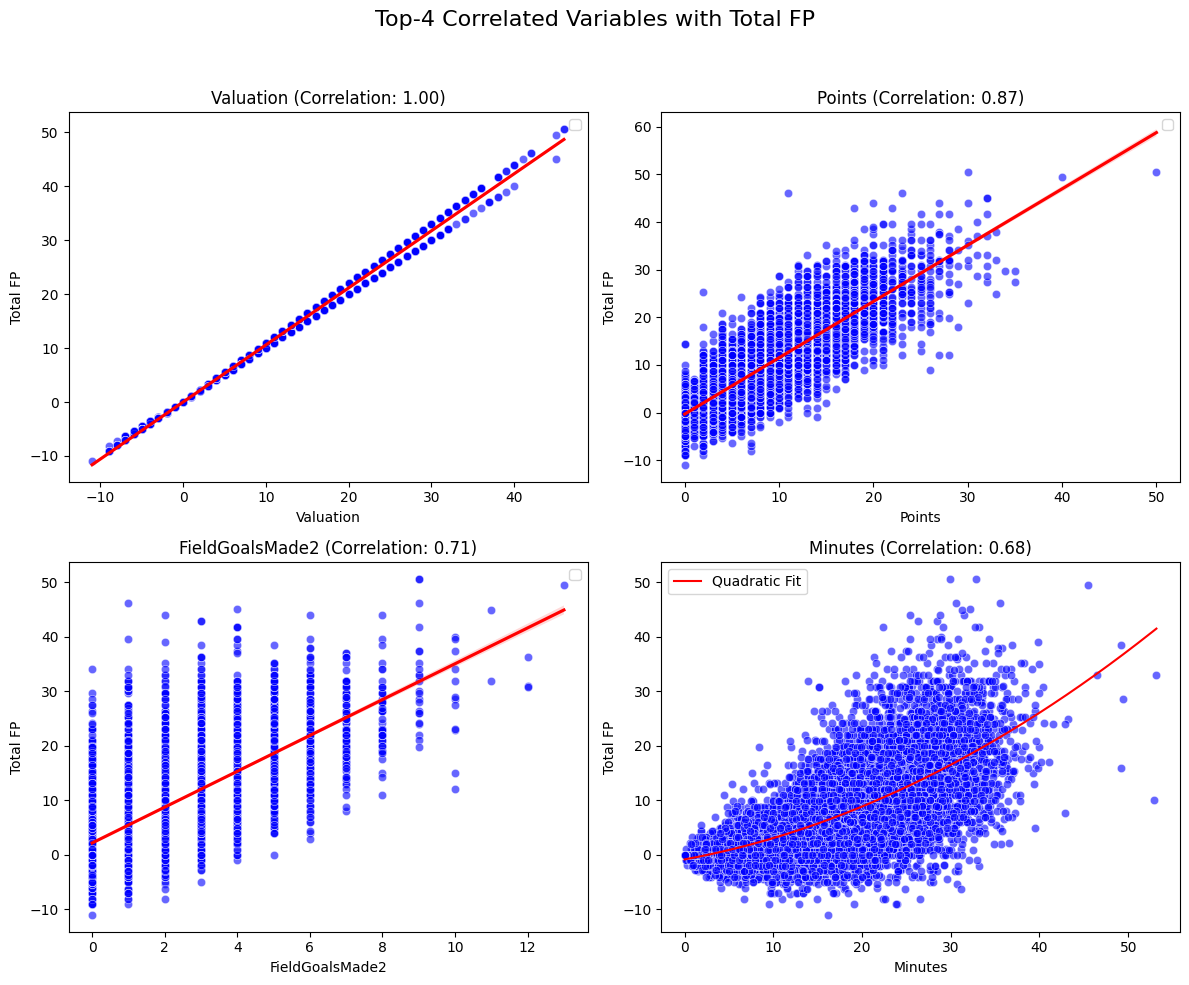

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract the top-4 correlated variables
top_4_features = correlation_df.head(4)

# Create a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Top-4 Correlated Variables with Total FP", fontsize=16)

# Iterate over the top-4 features and create scatter plots with appropriate regression lines
for i, (feature, correlation) in enumerate(zip(top_4_features['Feature'], top_4_features['Pearson_Correlation'])):
    ax = axes[i // 2, i % 2]  # Determine subplot position
    
    sns.scatterplot(
        x=all_players_stats[feature],
        y=all_players_stats['total_fp'],
        ax=ax,
        color='blue',
        alpha=0.6
    )
    
    # Fit regression lines
    if feature == 'Minutes':  # Quadratic relationship for Minutes
        # Fit a second-degree polynomial
        z = np.polyfit(all_players_stats[feature], all_players_stats['total_fp'], 2)
        p = np.poly1d(z)
        x = np.linspace(all_players_stats[feature].min(), all_players_stats[feature].max(), 500)
        ax.plot(x, p(x), color='red', label=f'Quadratic Fit')
    else:  # Linear regression for other features
        sns.regplot(
            x=all_players_stats[feature],
            y=all_players_stats['total_fp'],
            ax=ax,
            scatter=False,
            color='red',
            line_kws={'label': 'Linear Fit'}
        )
    
    # Set titles and labels
    ax.set_title(f"{feature} (Correlation: {correlation:.2f})")
    ax.set_xlabel(feature)
    ax.set_ylabel("Total FP")
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Study the correlation between total_fp and the lags of Valuation and total_fp

#### A) Valuation: Best lag is to take the last 13 matches of each player. 

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize list to hold model results
model_results = []

# Function to compute adjusted R-squared
def adjusted_r2(r_squared, n, k):
    return 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

# MAPE calculation function with epsilon for division safety
def calculate_mape(y_true, y_pred):
    # Define a small constant to prevent division by zero
    epsilon = 1e-10
    y_true_safe = np.where(y_true == 0, epsilon, y_true)
    return np.median(np.abs((y_true - y_pred) / y_true_safe)) * 100

# Function to evaluate models and calculate metrics
def evaluate_model(data, feature, model_name, weights=None):
    X = data[[feature]].copy()
    X = sm.add_constant(X)
    y = data['total_fp']
    
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # Metrics calculations
    r_squared_adj = adjusted_r2(model.rsquared, X.shape[0], X.shape[1] - 1)
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mape = calculate_mape(y, predictions)
    
    # Append results to model_results
    model_results.append({
        "Model": model_name,
        "Nature": feature,
        "Weights": weights,
        "R_sq_adjusted": r_squared_adj,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    })

# Function to calculate moving averages with custom window and weights
def calculate_moving_averages(group, window, weights):
    group = group[group['Valuation'] > 0].copy()  # Only include games with minutes played > 0 and create a copy

    # Calculate the simple moving average (SMA) using the specified window
    sma_feature = f'valuation_sma_{window}'
    group.loc[:, sma_feature] = group['Valuation'].rolling(window=window).mean()

    # Calculate the weighted moving average (WMA) using the specified window and weights
    wma_feature = f'valuation_wma_{window}'
    if len(weights) != window:
        raise ValueError("Length of weights list must match the specified window size")

    group.loc[:, wma_feature] = group['Valuation'].rolling(window=window).apply(
        lambda x: np.dot(x, weights) if len(x) == window else np.nan, raw=True
    )
    
    # shift the features
    group[sma_feature] = group[sma_feature].shift(1)
    group[wma_feature] = group[wma_feature].shift(1)
    
    # Custom function to apply the imputation logic
    def impute_missing_values(group, sma_col, wma_col):
        median_minutes = group['Valuation'].median()
        
        for col in [sma_col, wma_col]:
            for idx, row in enumerate(group.itertuples(), 1):  # Starts idx at 1
                if pd.isna(getattr(row, col)):
                    if idx == 1:
                        group.at[row.Index, col] = median_minutes
                    else:
                        prior_minutes = group['Valuation'].iloc[:idx-1]  # Get previous (k-1) minutes
                        group.at[row.Index, col] = (prior_minutes.sum() + median_minutes) / idx

        return group

    # Apply custom imputation logic for missing values in sma and wma columns
    group = impute_missing_values(group, sma_feature, wma_feature)
    
    # Returning the modified group and weights for tracking
    return group, weights

# Define multiple windows and weights
windows_and_weights = [
    (2, [0.7, 0.3]),
    (3, [0.6, 0.3, 0.1]),  # First window and weights
    (4, [0.4, 0.3, 0.2, 0.1]),  # Second window and weights
    (5, [0.4, 0.25, 0.15, 0.12, 0.08]),
    (6, [0.25, 0.20, 0.18, 0.15, 0.12, 0.10])
]

windows_and_weights = [(k, [1.0 / k] * k) for k in range(1, 16)]

df_grouped = []

# Apply moving averages per player for each window/weight configuration
for window_size, custom_weights in windows_and_weights:
    for _, player_group in all_players_stats.groupby('Player_ID'):
        player_group, weights_used = calculate_moving_averages(player_group, window=window_size, weights=custom_weights)
        df_grouped.append(player_group)
    
    # Concatenate all grouped data back into a single DataFrame
    df_with_moving_averages = pd.concat(df_grouped)

    # Drop rows with missing values in moving averages before model evaluation
    sma_feature = f'valuation_sma_{window_size}'
    wma_feature = f'valuation_wma_{window_size}'
    df_with_moving_averages.dropna(subset=[sma_feature, wma_feature], inplace=True)

    # Evaluate each model using different features
    
    evaluate_model(df_with_moving_averages, sma_feature, f'Model - {window_size} Window - SMA', weights='equal')
    # evaluate_model(df_with_moving_averages, wma_feature, f'Model - {window_size} Window - WMA', weights=weights_used)

# Finally, append the model with the actual minutes    
# evaluate_model(df_with_moving_averages, 'Valuation', 'Model - Actual Valuation', weights=None)
# Convert model results to DataFrame and display
results_df = pd.DataFrame(model_results)
results_df


,Model,Nature,Weights,R_sq_adjusted,RMSE,MAE,MAPE
0,Model - 1 Window - SMA,valuation_sma_1,equal,0.089630,7.459668,5.914653,47.091476
1,Model - 2 Window - SMA,valuation_sma_2,equal,0.135801,7.268040,5.731662,46.208250
2,Model - 3 Window - SMA,valuation_sma_3,equal,0.163123,7.152226,5.622740,44.911919
3,Model - 4 Window - SMA,valuation_sma_4,equal,0.176878,7.093208,5.566447,44.329265
4,Model - 5 Window - SMA,valuation_sma_5,equal,0.187863,7.045718,5.520286,44.141011
5,Model - 6 Window - SMA,valuation_sma_6,equal,0.196516,7.008079,5.483521,43.737040
6,Model - 7 Window - SMA,valuation_sma_7,equal,0.199754,6.993945,5.472597,43.981400
7,Model - 8 Window - SMA,valuation_sma_8,equal,0.203417,6.977921,5.464443,43.874202
8,Model - 9 Window - SMA,valuation_sma_9,equal,0.206942,6.962467,5.451026,43.773677
9,Model - 10 Window - SMA,valuation_sma_10,equal,0.210036,6.948869,5.441460,43.798948


#### B) Total_fp

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize list to hold model results
model_results = []

# Function to compute adjusted R-squared
def adjusted_r2(r_squared, n, k):
    return 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

# MAPE calculation function with epsilon for division safety
def calculate_mape(y_true, y_pred):
    # Define a small constant to prevent division by zero
    epsilon = 1e-10
    y_true_safe = np.where(y_true == 0, epsilon, y_true)
    return np.median(np.abs((y_true - y_pred) / y_true_safe)) * 100

# Function to evaluate models and calculate metrics
def evaluate_model(data, feature, model_name, weights=None):
    X = data[[feature]].copy()
    X = sm.add_constant(X)
    y = data['total_fp']
    
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)
    
    # Metrics calculations
    r_squared_adj = adjusted_r2(model.rsquared, X.shape[0], X.shape[1] - 1)
    mae = mean_absolute_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    mape = calculate_mape(y, predictions)
    
    # Append results to model_results
    model_results.append({
        "Model": model_name,
        "Nature": feature,
        "Weights": weights,
        "R_sq_adjusted": r_squared_adj,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE": mape
    })

# Function to calculate moving averages with custom window and weights
def calculate_moving_averages(group, window, weights):
    group = group[group['total_fp'] > 0].copy()  # Only include games with minutes played > 0 and create a copy

    # Calculate the simple moving average (SMA) using the specified window
    sma_feature = f'total_fp_sma_{window}'
    group.loc[:, sma_feature] = group['total_fp'].rolling(window=window).mean()

    # Calculate the weighted moving average (WMA) using the specified window and weights
    wma_feature = f'total_fp_wma_{window}'
    if len(weights) != window:
        raise ValueError("Length of weights list must match the specified window size")

    group.loc[:, wma_feature] = group['total_fp'].rolling(window=window).apply(
        lambda x: np.dot(x, weights) if len(x) == window else np.nan, raw=True
    )
    
    # shift the features
    group[sma_feature] = group[sma_feature].shift(1)
    group[wma_feature] = group[wma_feature].shift(1)
    
    # Custom function to apply the imputation logic
    def impute_missing_values(group, sma_col, wma_col):
        median_minutes = group['total_fp'].median()
        
        for col in [sma_col, wma_col]:
            for idx, row in enumerate(group.itertuples(), 1):  # Starts idx at 1
                if pd.isna(getattr(row, col)):
                    if idx == 1:
                        group.at[row.Index, col] = median_minutes
                    else:
                        prior_minutes = group['total_fp'].iloc[:idx-1]  # Get previous (k-1) minutes
                        group.at[row.Index, col] = (prior_minutes.sum() + median_minutes) / idx

        return group

    # Apply custom imputation logic for missing values in sma and wma columns
    group = impute_missing_values(group, sma_feature, wma_feature)
    
    # Returning the modified group and weights for tracking
    return group, weights

# Define multiple windows and weights
windows_and_weights = [
    (2, [0.7, 0.3]),
    (3, [0.6, 0.3, 0.1]),  # First window and weights
    (4, [0.4, 0.3, 0.2, 0.1]),  # Second window and weights
    (5, [0.4, 0.25, 0.15, 0.12, 0.08]),
    (6, [0.25, 0.20, 0.18, 0.15, 0.12, 0.10])
]

windows_and_weights = [(k, [1.0 / k] * k) for k in range(1, 16)]

df_grouped = []

# Apply moving averages per player for each window/weight configuration
for window_size, custom_weights in windows_and_weights:
    for _, player_group in all_players_stats[all_players_stats['Minutes']>0].groupby('Player_ID'):
        player_group, weights_used = calculate_moving_averages(player_group, window=window_size, weights=custom_weights)
        df_grouped.append(player_group)
    
    # Concatenate all grouped data back into a single DataFrame
    df_with_moving_averages = pd.concat(df_grouped)

    # Drop rows with missing values in moving averages before model evaluation
    sma_feature = f'total_fp_sma_{window_size}'
    wma_feature = f'total_fp_wma_{window_size}'
    df_with_moving_averages.dropna(subset=[sma_feature, wma_feature], inplace=True)

    # Evaluate each model using different features
    
    evaluate_model(df_with_moving_averages, sma_feature, f'Model - {window_size} Window - SMA', weights='equal')
    # evaluate_model(df_with_moving_averages, wma_feature, f'Model - {window_size} Window - WMA', weights=weights_used)

# Finally, append the model with the actual minutes    
# evaluate_model(df_with_moving_averages, 'Valuation', 'Model - Actual Valuation', weights=None)
# Convert model results to DataFrame and display
results_df = pd.DataFrame(model_results)
results_df


,Model,Nature,Weights,R_sq_adjusted,RMSE,MAE,MAPE
0,Model - 1 Window - SMA,total_fp_sma_1,equal,0.087215,7.469558,5.923182,47.159085
1,Model - 2 Window - SMA,total_fp_sma_2,equal,0.133321,7.278463,5.739204,46.097676
2,Model - 3 Window - SMA,total_fp_sma_3,equal,0.161222,7.160346,5.629179,45.236596
3,Model - 4 Window - SMA,total_fp_sma_4,equal,0.174360,7.104049,5.575304,44.336583
4,Model - 5 Window - SMA,total_fp_sma_5,equal,0.185794,7.054685,5.529206,44.334185
5,Model - 6 Window - SMA,total_fp_sma_6,equal,0.194589,7.016479,5.491205,43.877899
6,Model - 7 Window - SMA,total_fp_sma_7,equal,0.198277,7.000398,5.478773,44.082055
7,Model - 8 Window - SMA,total_fp_sma_8,equal,0.202209,6.983208,5.469759,44.070073
8,Model - 9 Window - SMA,total_fp_sma_9,equal,0.205759,6.967655,5.456518,43.821270
9,Model - 10 Window - SMA,total_fp_sma_10,equal,0.208914,6.953804,5.446944,43.805015


: 